# HW4

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.special

# Problem 1

## (a)

For $a$ and $b$ non-zero, $p(i,k) > 0$ and $q(i,m) > 0$. Therefore, $P(i,i') > 0$ and so it is possible to transition between any two states. Hence, the chain is irreducible.

## (b)

In [174]:
N = 40
a = 1
b = 0.1

def p(i,k,N=N,a=a):
    return scipy.special.comb(N-i,k) * (a*i/N)**k * (1 - (a*i/N))**(N - i - k) 

def q(i,m,N=N,b=b):
    return scipy.special.comb(i,m)* b**m * (1 - b)**(i - m) 

def P(i,i2,N=N,a=a,b=b):
    res = 0
    d = i2 - i
    for k in range(N-i+1):
        for m in range(i+1):
            if (k - m) == d:
                res += p(i,k,N,a)*q(i,m,N,b)
    return res

P_mat = np.zeros((N+1,N+1))
for x in range(N+1):
    for y in range(N+1):
        P_mat[x,y] = P(x,y,N,a,b)
print("Stochstic matrix P\n",P_mat)

Stochstic matrix P
 [[1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.72546092e-02 3.72546092e-01 3.53441164e-01 ... 3.35672209e-57
  4.52964103e-60 2.97785021e-63]
 [1.42395741e-03 2.84791483e-02 1.69375987e-01 ... 7.48311140e-45
  2.12821760e-47 2.94676283e-50]
 ...
 [2.50000000e-41 9.50000000e-39 1.75750000e-36 ... 1.50298218e-01
  7.12685920e-02 1.64688233e-02]
 [2.50000000e-41 9.75000000e-39 1.84275000e-36 ... 1.48265030e-01
  6.97986139e-02 1.60126232e-02]
 [1.00000000e-40 3.60000000e-38 6.31800000e-36 ... 1.42334428e-01
  6.56928131e-02 1.47808829e-02]]


** Verfication that P is a stochastic matrix ** i.e. rows sums should be 1.0 

In [175]:
# rows sums
print(np.sum(P_mat,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## (c)

In [176]:
u,v = np.linalg.eig(np.transpose(P_mat))
# list of eigenvalues
print("Eigenvalues",u)

Eigenvalues [ 1.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
  4.20483819e-01+0.00000000e+00j  1.84541432e-01+0.00000000e+00j
  1.39033435e-01+0.00000000e+00j  8.49810756e-02+0.00000000e+00j
  4.13852689e-02+0.00000000e+00j  3.28849726e-02+0.00000000e+00j
  2.16086918e-02+0.00000000e+00j  1.29409210e-02+0.00000000e+00j
  1.20614475e-02+0.00000000e+00j  8.28302504e-03+0.00000000e+00j
  5.93760874e-03+0.00000000e+00j  3.93706441e-03+0.00000000e+00j
  2.46745123e-03+0.00000000e+00j  1.46726542e-03+0.00000000e+00j
  8.28065375e-04+0.00000000e+00j  4.43172293e-04+0.00000000e+00j
  2.24545142e-04+0.00000000e+00j  1.07321362e-04+0.00000000e+00j
  4.82171731e-05+0.00000000e+00j  2.01283051e-05+0.00000000e+00j
  7.81995151e-06+0.00000000e+00j  2.66419694e-06+0.00000000e+00j
 -1.68046720e-06+0.00000000e+00j  9.42185765e-07+0.00000000e+00j
  1.57489581e-07+4.18004766e-08j  1.57489581e-07-4.18004766e-08j
  5.04457375e-09+1.51640223e-08j  5.04457375e-09-1.51640223e-08j
 -9.39758379e

The first eigenvector is all zeroes except 1.0 at the first index.

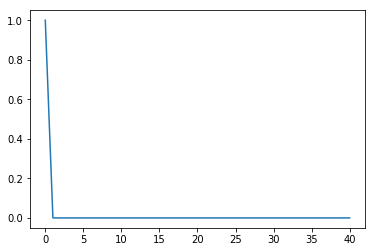

In [178]:
plt.plot(np.real(v[:,0]))

From the plot of elements of the eigenvector with eigenvalue 1, we see that it is $[1,0,...,0]$

In [179]:
# list of eigenvalues sorted in ascending order
print(np.sort(np.real(u)))

[-1.68046720e-06 -9.39758379e-10 -9.39758379e-10 -1.04968751e-10
 -2.78548738e-11 -5.39489194e-14 -7.97095567e-15 -3.36962187e-16
  1.90462054e-13  5.68764608e-13  5.68764608e-13  9.64849678e-11
  5.04457375e-09  5.04457375e-09  1.57489581e-07  1.57489581e-07
  9.42185765e-07  2.66419694e-06  7.81995151e-06  2.01283051e-05
  4.82171731e-05  1.07321362e-04  2.24545142e-04  4.43172293e-04
  8.28065375e-04  1.46726542e-03  2.46745123e-03  3.93706441e-03
  5.93760874e-03  8.28302504e-03  1.20614475e-02  1.29409210e-02
  2.16086918e-02  3.28849726e-02  4.13852689e-02  8.49810756e-02
  1.39033435e-01  1.84541432e-01  4.20483819e-01  1.00000000e+00
  1.00000000e+00]


The second largest eigenvalue is also 1.0 (as far as machine precision goes). 

## (d)

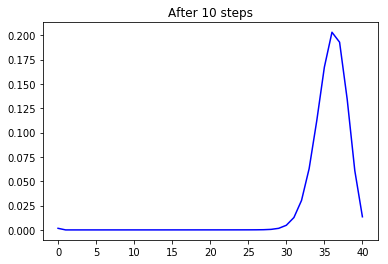

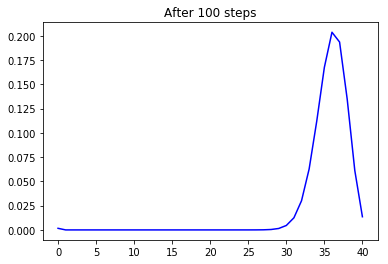

In [182]:
lambda_dist = np.ones(N+1)/N
lambda_dist[0] = 0

n = 10
new_dist = np.transpose(lambda_dist) @ np.linalg.matrix_power(P_mat,n)
plt.figure(1)
plt.title("After 10 steps")
plt.plot(new_dist,'b')

n = 100
new_dist = np.transpose(lambda_dist) @ np.linalg.matrix_power(P_mat,n)
plt.figure(2)
plt.title("After 100 steps")
plt.plot(new_dist,'b')

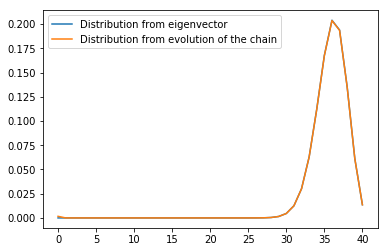

In [184]:
# plot of distribution with second largest eigenvalue
exp_dist = v[:,1]/np.sum(v[:,1])
plt.plot(np.real(exp_dist),label="Distribution from eigenvector")
plt.plot(np.real(new_dist),label="Distribution from evolution of the chain")
plt.legend()

The two distributions exactly match up here.

## (d)

In [271]:
N = 40

a_vec = np.linspace(0.1,1,10)
b_vec= np.linspace(0.1,1,10)
eig_table = []
for a in a_vec:
    eig_vec = []
    for b in b_vec:
        P_mat = np.zeros((N+1,N+1))
        for x in range(N+1):
            for y in range(N+1):
                P_mat[x,y] = P(x,y,N,a,b)

        u,v = np.linalg.eig(np.transpose(P_mat))
        sorted_eig = np.sort(np.real(u))
        second_largest = sorted_eig[-2]
        eig_vec.append(second_largest)
    eig_table.append(eig_vec)

Text(0.5,1,'Second largest eigenvalue')

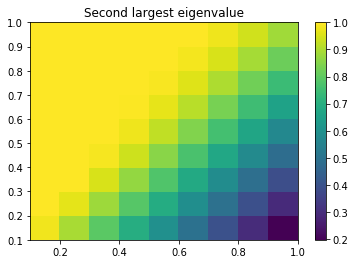

In [272]:
XX,YY = np.meshgrid(a_vec,b_vec)
plt.pcolor(XX,YY,np.array(eig_table))
plt.colorbar()
plt.title("Second largest eigenvalue")

We can see that near $a = 1.0,b = 0.1$, the second largest eigenvalue is close to 1.0 and the state is metastable. As soon as we move away from this point, the eigenvalue becomes less than 1.0 and state is therefore not stable. 

# Problem 2

## (b)

I will use fixed number of steps for each temperature.

In [288]:
# N : number of spins
N = 30
# s a matrix of spins

# start with all the spins up
s = np.ones((N,N))

beta_vec = np.linspace(0.2,2,100)

m_vec = []
for beta in beta_vec:
    s = np.ones((N,N))
    running_mean = 0
    for i in range(100000):
        (i,j) = (np.random.randint(N),np.random.randint(N))
        delta_H = 2*s[i,j]*(s[(i+1) % N,j] + s[i,(j+1) %N] + s[(i-1) % N,j] + s[i,(j-1) % N]) 
        prob = np.exp(-beta*delta_H)
        if prob > 1.0:
            s[i,j] = -s[i,j]
        else:
            u = np.random.uniform(0,1)
            if u < prob:
                # accept
                s[i,j] = -s[i,j]
            else:
                # reject
                pass
        m = np.mean(s)
        running_mean = (running_mean*num_steps + m)/(num_steps + 1)
    m_vec.append(running_mean)
    

In [289]:
def exact_m(beta):
    if beta > 0.4408:
        return np.power(1 - np.power(np.sinh(2*beta),-4),0.125)
    else:
        return 0
exact_m_vec = np.array([exact_m(beta) for beta in beta_vec])

Text(0,0.5,'$m(\\beta)$')

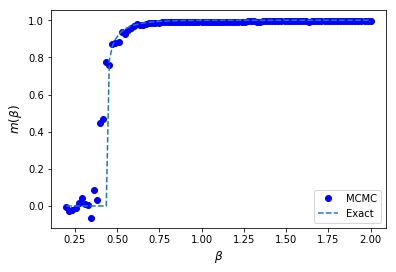

In [290]:
plt.plot(beta_vec,m_vec,"bo",label="MCMC")
plt.plot(beta_vec,exact_m_vec,'--',label="Exact")
plt.legend()
plt.xlabel(r"$\beta$",fontsize=12)
plt.ylabel(r"$m(\beta)$",fontsize=12)

## (c)
I will use running variance of the mean less than a threshold as the stopping criterion.


In [269]:
# N : number of spins
N = 30
# s a matrix of spins

# start with all the spins up
s = np.ones((N,N))

num_steps_vec = []
beta_vec = np.linspace(0.2,2,50)
for beta in beta_vec:
    num_steps = 0

    m = 0
    running_mean = 0
    running_var = 0
    running_mean_mean = 0
    running_var_mean = 0

    r_mean_vec = []
    r_var_vec = []
    r_mean_mean_vec = []
    r_var_mean_vec = []

    s = np.ones((N,N))
    while num_steps < 20000 or running_var_mean/num_steps > 1e-8:
        (i,j) = (np.random.randint(N),np.random.randint(N))
        delta_H = 2*s[i,j]*(s[(i+1) % N,j] + s[i,(j+1) %N] + s[(i-1) % N,j] + s[i,(j-1) % N]) 
        prob = np.exp(-beta*delta_H)
        if prob > 1.0:
            s[i,j] = -s[i,j]
        else:
            u = np.random.uniform(0,1)
            if u < prob:
                # accept
                s[i,j] = -s[i,j]
            else:
                # reject
                pass
        m = np.mean(s)

        running_mean = (running_mean*num_steps + m)/(num_steps + 1)
        r_mean_vec.append(running_mean)
        if num_steps == 0:
            pass
        else:
            running_var = ((num_steps-1)*running_var + (m - running_mean)**2)/(num_steps)
            r_var_vec.append(running_var)

        running_mean_mean = (running_mean_mean*num_steps + running_mean)/(num_steps + 1)
        r_mean_mean_vec.append(running_mean_mean)
        if num_steps == 0:
            pass
        else:
            running_var_mean = ((num_steps-1)*running_var_mean + (running_mean - running_mean_mean)**2)/(num_steps)
            r_var_mean_vec.append(running_var_mean)

        num_steps += 1

        if num_steps > 1e6:
            break

    #print(beta,num_steps)
    num_steps_vec.append(num_steps)










Text(0.5,0,'$\\beta$')

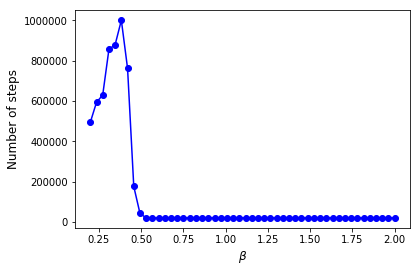

In [284]:
beta_vec = np.linspace(0.2,2,50)
plt.plot(beta_vec,num_steps_vec,'bo-')
plt.ylabel("Number of steps",fontsize=12)
plt.xlabel(r"$\beta$",fontsize=12)